In [2]:
import numpy as np
from math import pow
import matplotlib.pyplot as plt

In [9]:
class ForwardEuler:
    def __init__(self, f):
        self.f = lambda t, u: np.asarray(f(t, u), float)

    def set_initial_condition(self,u0):
        if isinstance(u0, (float,int)):
            self.neq = 1
            u0 = float(u0)
        else:
            u0 = np.asarray(u0)
            self.neq = u0.size

        self.u0 = u0

    def solve(self, t_span, N, J, tiJ, tfJ):
        t0, T = t_span
        self.dt = (T-t0)/N
        self.t = np.zeros(N+1)
        self.j = np.zeros(N+1)
        if self.neq == 1:
            self.u = np.zeros(N+1)
        else:
            self.u = np.zeros((N+1, self.neq))

        self.t[0] = t0
        self.u[0] = self.u0

        for n in range(N):
            self.n = n
            self.t[n+1] = self.t[n] + self.dt
            if self.dt*n >= tiJ and self.dt*n <= tfJ:
                self.u[n+1] = self.advance(J=J)
                self.j[n+1] = J
            else:
                self.u[n+1] = self.advance(J=0)
                self.j[n+1] = 0
        return self.t, self.u, self.j

    def advance(self, J):
        u, dt, f, n, t = self.u, self.dt, self.f, self.n, self.t
        unew = u[n] + dt*(f(t[n],u[n]) + J)
        return unew

In [4]:
class Hodgkin_Huxley:
    def __init__(self, cm=1, gna=120, ena=115, gk=36, ek=-12, gv=0.3, ev=10.6):
        self.cm = cm
        self.gna = gna
        self.ena = ena
        self.gk = gk
        self.ek = ek
        self.gv = gv
        self.ev = ev


    def __call__(self, t, u):
        V, n, m, h = u

        #valores para alfa e beta
        if V == 10:
             alphan = 1 / (10 * np.exp((10-V)/10)) #regra de L’Hopital
        else:
             alphan = 0.01 * (10 - V) / (np.exp((10-V) / 10) - 1)

        if V == 25:
             alpham = 1 / 10 * np.exp((25-V)/10) #regra de L’Hopital
        else:
             alpham = 0.1 * (25 - V) / (np.exp((25-V) / 10) - 1)

        alphah = 0.07 * np.exp(-V/20)
        betan = 0.125 * np.exp(-V/80)
        betam = 4 * np.exp(-V/18)
        betah = 1 / (np.exp((30-V)/10) + 1)

        #valores das derivadas
        dV = (-self.gna * pow(m, 3) * h * (V - self.ena)) - (self.gk * pow(n, 4) * (V - self.ek)) - (self.gv * (V - self.ev))
        dn = (alphan * (1-n)) - (betan * n)
        dm = (alpham * (1-m)) - (betam * m)
        dh = (alphah * (1-h)) - (betah * h)
        return [dV, dn, dm, dh]

In [11]:
ti = 0
tf = 30
tiJ = 0
tfJ = 30
N = 30000
J = 0

problem = Hodgkin_Huxley()
solver = ForwardEuler(problem)
V0, n0, m0, h0 = 0, 0.32, 0.05, 0.6
solver.set_initial_condition((V0, n0, m0, h0))
t, u, j = solver.solve(t_span=(ti, tf),N=N, J=J, tiJ=tiJ, tfJ=tfJ)

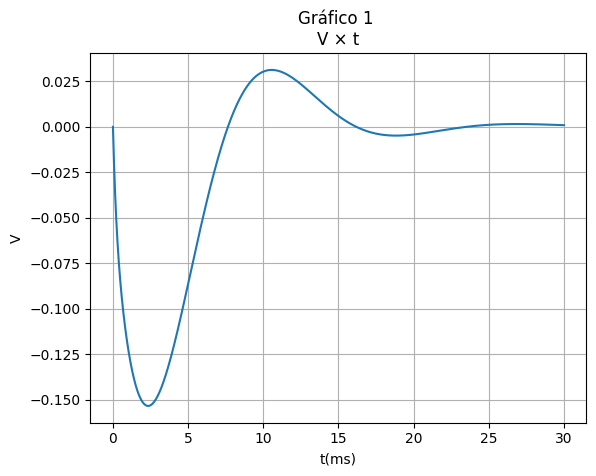

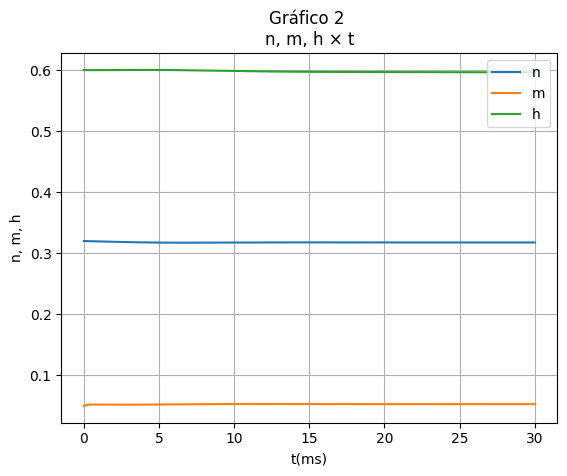

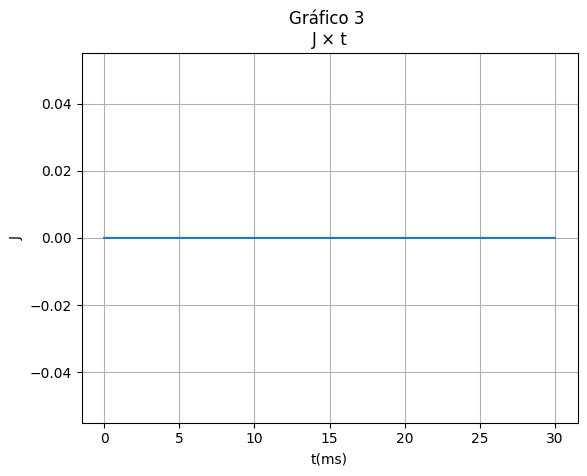

In [12]:
plt.title('Gráfico 1 \nV × t')
plt.grid()
plt.xlabel('t(ms)')
plt.ylabel('V')
plt.plot(t, u[:, 0])
plt.show()

plt.title('Gráfico 2 \nn, m, h × t')
plt.grid()
plt.xlabel('t(ms)')
plt.ylabel('n, m, h')
plt.plot(t, u[:, 1], label='n')
plt.plot(t, u[:, 2], label='m')
plt.plot(t, u[:, 3], label='h')
plt.legend()
plt.show()

plt.title('Gráfico 3 \nJ × t')
plt.grid()
plt.xlabel('t(ms)')
plt.ylabel('J')
plt.plot(t, j)
plt.show()